In [ ]:
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(256, 256)


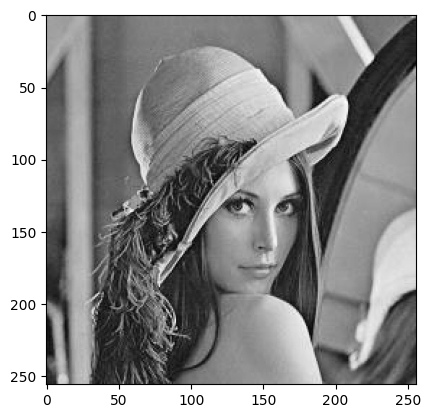

In [ ]:
#img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/gsy.jpg')
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg1.shape)
plt.imshow(gImg1, cmap='gray')

In [ ]:
gOutimg = np.zeros((gImg1.shape[0], gImg1.shape[1]))

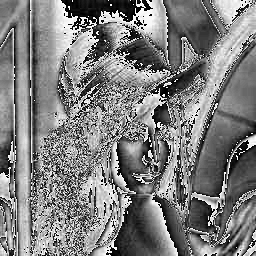

In [ ]:
#비트클리핑 구현, 나머지 연산

for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    val = gImg1[h,w] % 64
    val = val * 4
    gOutimg[h, w] = val

#plt.imshow(gOutimg, cmap='gray') #약간 왜곡됨(plt)
cv2_imshow(gOutimg) #원래 이미지

In [ ]:
#등명암 윤곽화 구현

equalVal = 200
width = 5

min = equalVal - width
max = equalVal + width

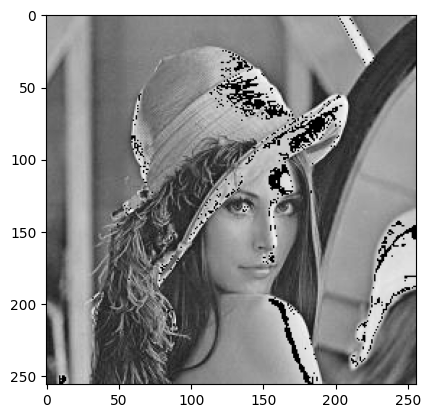

In [ ]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    if (gImg1[h,w] > min and gImg1[h,w] < max): #영역을 나눌 명암 범위 안에 들어옴
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = gImg1[h,w]

plt.imshow(gOutimg, cmap = 'gray')

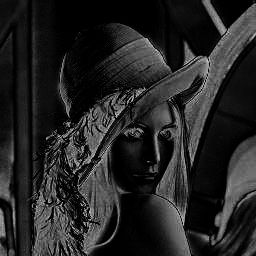

In [ ]:
#파라볼라 구현

for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    val = 255*(gImg1[h,w]/128-1)**2
    gOutimg[h, w] = val

cv2_imshow(gOutimg)

In [ ]:
#비트 평면 분할 구현

planeNum = 8 #8번째 비트(최상위 비트)
planeValue = 1

for i in range(planeNum-1):
  planeValue = planeValue * 2

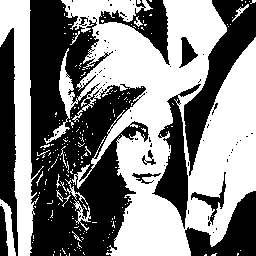

In [ ]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = (int)(gImg1[h,w] / planeValue)
    if (imVal == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255

cv2_imshow(gOutimg)

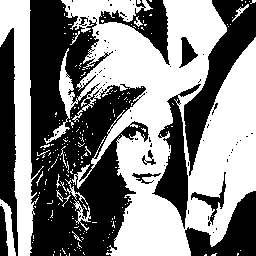

In [ ]:
#(최상위 비트 평면만 보기)

for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = (int)(gImg1[h,w] / 128) #128(8번째 비트가 1인 값) -> 128로 나누면 128보다 낮은 값은 0이 됨
    if (imVal == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255

cv2_imshow(gOutimg)

In [ ]:
planeNum = 7 #7번째 비트
planeValue = 1

for i in range(planeNum-1):
  planeValue = planeValue * 2

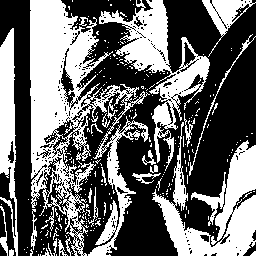

In [ ]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = (int)(gImg1[h,w] / planeValue)
    if (imVal % 2 == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255

cv2_imshow(gOutimg)

In [ ]:
planeNum = 6 #6번째 비트
planeValue = 1

for i in range(planeNum-1):
  planeValue = planeValue * 2

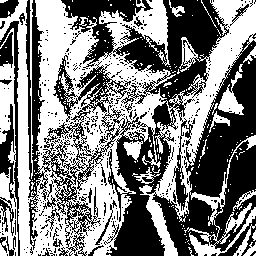

In [ ]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = (int)(gImg1[h,w] / planeValue)
    if (imVal % 2 == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255

cv2_imshow(gOutimg)

In [ ]:
planeNum = 1 #1번째 비트
planeValue = 1

for i in range(planeNum-1):
  planeValue = planeValue * 2

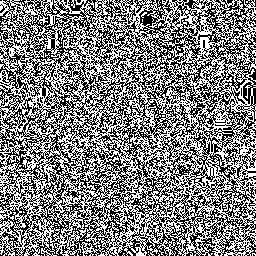

In [ ]:
for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = (int)(gImg1[h,w] / planeValue)
    if (imVal % 2 == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255

cv2_imshow(gOutimg)

(286, 322)


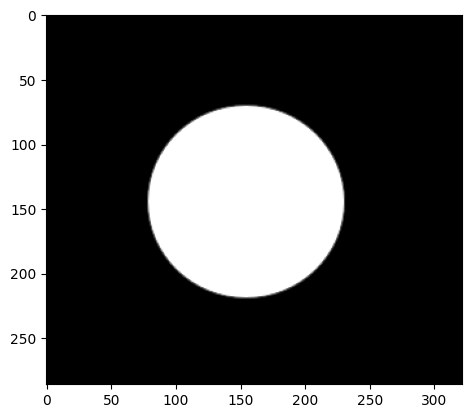

In [ ]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/circle.bmp')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gImg2 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gImg2.shape)
plt.imshow(gImg2, cmap='gray')

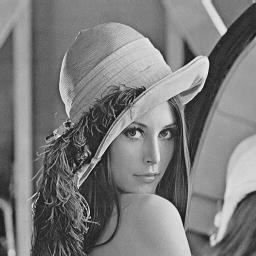

In [ ]:
#워터마크 구현 (lena256 이미지 안에 circle 이미지 숨김)

gWaterMarker = gImg1.copy() #원본 이미지 훼손 막기 위해 카피

for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imgVal = gImg2[h,w]
    if (imgVal > 128): #흰색(최하위비트를 1로 세팅)
      if (gImg1[h,w] % 2 == 0): #최하위비트가 0(1: 홀수, 0: 짝수)
        gWaterMarker[h,w] += 1 #0이었던 걸 1을 더해 1로 바꿈
    else:
      if (gImg1[h,w] % 2 == 1):
        gWaterMarker[h,w] -= 1 #1이었던 걸 1을 빼 0으로 바꿈

cv2_imshow(gWaterMarker)

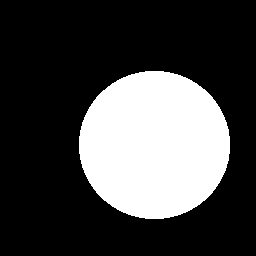

In [ ]:
#워터마크 최하위 비트에 숨겨졌는지 확인

planeNum = 1 #1번째 비트
planeValue = 1

for i in range(planeNum-1):
  planeValue = planeValue * 2

for h in range(0, gImg1.shape[0]):
  for w in range(0, gImg1.shape[1]):
    imVal = (int)(gWaterMarker[h,w] / planeValue)
    if (imVal % 2 == 0):
      gOutimg[h, w] = 0
    else:
      gOutimg[h, w] = 255

cv2_imshow(gOutimg)